# Estudio de la Cinemática y Dinámica de un Robot SCARA con Tres Grados de Libertad

## Resumen 

Este trabajo analiza la configuración de un robot SCARA compuesto por tres eslabones, uno de los cuales está fijado al sistema inercial, y tres juntas rotacionales. Con el fin de determinar la relación entre la posición, la orientación y el desplazamiento de cada articulación, se desarrollará el modelo cinemático de la pose, las velocidades y la aceleración, desde el origen hasta el punto encargado de ejecutar las tareas que se asignan al robot. Posteriormente, se planteará el modelo dinámico de esta configuración utilizando el enfoque de Euler-Lagrange, tanto en su forma directa como inversa. Este análisis busca comprender cómo las juntas y la interacción que tienen entre los eslabones influyen en el comportamiento del sistema. El desarrollo integrara los modelos cinemáticos y dinámicos, directos e inversos.

## Introducción

Con el objetivo de aumentar la producción, la precisión y la eficiencia de los procesos, se ha impulsado la creación de sistemas manipuladores programables y automatizables, conocidos como robots.[1] Estas máquinas fueron implementadas inicialmente en la industria, y con el tiempo han sido adoptadas en otros campos de aplicación, en los cuales ya cuentan con cierta capacidad para razonar y tomar decisiones a fin de cumplir sus objetivos.

En el aspecto industrial, los robots destacan por su capacidad para ejecutar ciclos prolongados de tareas sin comprometer su precisión. En la actualidad la producción industrial exige cada vez mayor flexibilidad en los procesos de fabricación, lo que demanda sistemas robóticos capaces de adaptarse tanto a condiciones actuales como futuras [1].

Un ejemplo de las soluciones robóticas industriales actuales, es el robot SCARA (Selective Compliant Assembly Robot Arm), de arquitectura en serie, es ampliamente utilizado en operaciones de ensamblaje y tareas de “pick and place”. Este tipo de robot suele incorporar dos juntas rotacionales para el posicionamiento rápido en el plano horizontal, y una junta lineal para el desplazamiento en el eje vertical [2], [3]. Por lo general, el movimiento del robot SCARA debe ser de alta velocidad y precisión. Por lo tanto, el análisis de la cinemática del robot debe ser cuidadoso, preciso y eficiente [3].

Debido a que el modelo DH (Denavit-Hertenberg) da bastante información con respecto de la posición del elemento y es fácil extraer las variables de interés, se realizó el modelo cinemático con el método DH, y se utilizó la simulación Matlab para verificar el modelo.

Entre los aspectos críticos en el diseño de robots se encuentran el tiempo de ciclo y la capacidad de carga útil. Esta última se refiere a la cantidad de masa que puede soportar el punto donde se realiza el trabajo, y está influenciada por el peso de cada eslabón, así como por el de la herramienta utilizada para ejecutar la tarea asignada. Este factor es fundamental, ya que involucra directamente el comportamiento dinámico del robot. Asimismo, debe considerarse el tiempo requerido para completar un ciclo completo de la tarea programada. Ejemplo de ellos es el IRB 930 SCARA de alta carga útil con una capacidad de 12 kg o 22 kg y con una mejora en el tiempo de ciclo de hasta en un 10%.[1]

A diferencia de los robots SCARA comerciales, nuestro modelo está compuesto por tres eslabones y tres juntas rotacionales. Como consecuencia, el movimiento se limita principalmente al plano horizontal, por ende, se necesita desarrollar el modelo cinemático y dinámico del sistema. Permitiendo comprender su comportamiento y requerimientos necesarios para garantizar un funcionamiento óptimo.

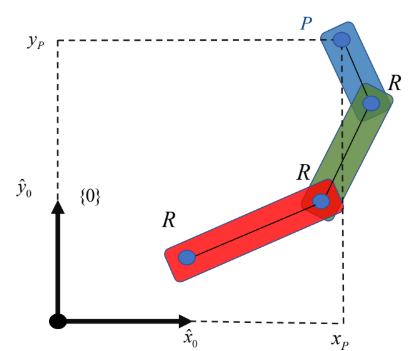

## Modelado cinemático de la postura

Comenzamos por el desarrollo del modelo cinemático de la postura, para lo cual se define inicialmente el sistema de referencia inercial. Posteriormente, se establecen los sistemas de coordenadas asociados a cada una de las juntas rotacionales, provocando las restricciones de movimiento del robot.

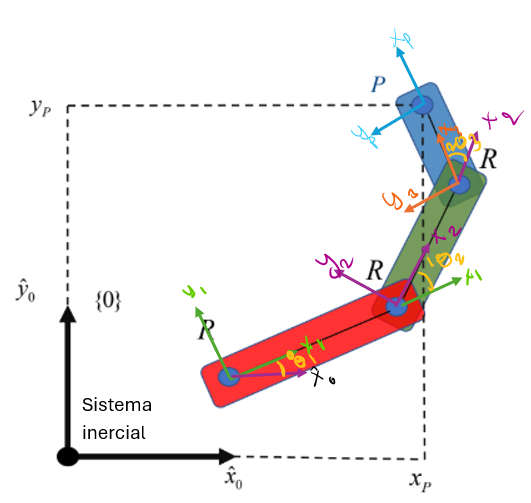

Como estamos considerando este movimiento en el plano, la posición en el eje Z no nos importa de momento. Nuestro referente ahora es el eje x, el cual nos mostrara la rotación que experimenta cada eslabón alrededor del eje z. El eje x se orientado de manera paralela a la longitud del eslabón, para poder describir su cambio de orientación.

Como se mencionó antes se ocupó el modelo Denavit-Hertenberg por lo cual se aplica el siguiente modelo.


(\begin{array}{cccc} \cos\left(\mathrm{ai}_{j}\right)\,\cos\left(\mathrm{bi}_{j}\right) & \cos\left(\mathrm{ai}_{j}\right)\,\sin\left(\mathrm{bi}_{j}\right)\,\sin\left(\mathrm{gi}_{j}\right)-\cos\left(\mathrm{gi}_{j}\right)\,\sin\left(\mathrm{ai}_{j}\right) & \sin\left(\mathrm{ai}_{j}\right)\,\sin\left(\mathrm{gi}_{j}\right)+\cos\left(\mathrm{ai}_{j}\right)\,\cos\left(\mathrm{gi}_{j}\right)\,\sin\left(\mathrm{bi}_{j}\right) & x_{i,j}\\ \cos\left(\mathrm{bi}_{j}\right)\,\sin\left(\mathrm{ai}_{j}\right) & \cos\left(\mathrm{ai}_{j}\right)\,\cos\left(\mathrm{gi}_{j}\right)+\sin\left(\mathrm{ai}_{j}\right)\,\sin\left(\mathrm{bi}_{j}\right)\,\sin\left(\mathrm{gi}_{j}\right) & \cos\left(\mathrm{gi}_{j}\right)\,\sin\left(\mathrm{ai}_{j}\right)\,\sin\left(\mathrm{bi}_{j}\right)-\cos\left(\mathrm{ai}_{j}\right)\,\sin\left(\mathrm{gi}_{j}\right) & y_{i,j}\\ -\sin\left(\mathrm{bi}_{j}\right) & \cos\left(\mathrm{bi}_{j}\right)\,\sin\left(\mathrm{gi}_{j}\right) & \cos\left(\mathrm{bi}_{j}\right)\,\cos\left(\mathrm{gi}_{j}\right) & z_{i,j}\\ 0 & 0 & 0 & 1 \end{array}\)

Esta matriz contine la matriz de orientación, el vector de posición y la escala del punto que se analiza.

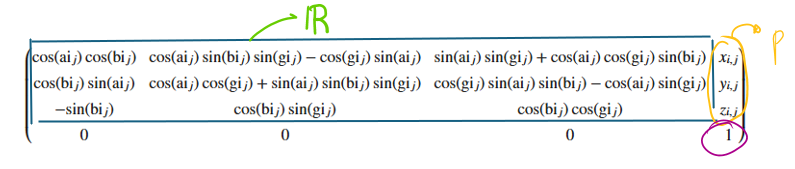

Del sistema inercial al sistema uno se tiene una rotación  theta _O_1, por ende la matriz tendrá solo valores en los componentes de XY, XX,  YX, YY y Z ya que el ángulo afecta directamente al eje X y Y, y no hay un cambio en el eje Z. Por ende nuestra transformación queda como:

(\begin{array}{cccc} \cos\left(\theta _{O,1}\right) & -\sin\left(\theta _{O,1}\right) & 0 & x_{O,1}\\ \sin\left(\theta _{O,1}\right) & \cos\left(\theta _{O,1}\right) & 0 & y_{O,1}\\ 0 & 0 & 1 & 0\\ 0 & 0 & 0 & 1 \end{array}\)

La matriz de rotación para el sistema de referencias dos y tres será igual que el sistema de referencia a uno, solo cambia el ángulo que afecta a la orientación. La posición solo depende de la longitud del eslabón por la orientación del eje x. Por ende las transformadas quedan como:


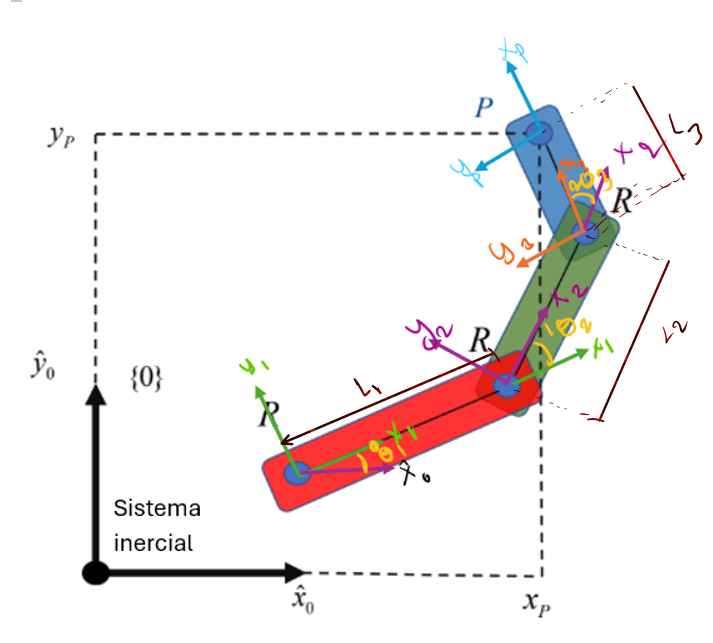

(\begin{array}{cccc} \cos\left(\theta _{1,2}\right) & -\sin\left(\theta _{1,2}\right) & 0 & L_{1}\\ \sin\left(\theta _{1,2}\right) & \cos\left(\theta _{1,2}\right) & 0 & 0\\ 0 & 0 & 1 & 0\\ 0 & 0 & 0 & 1 \end{array}\)

(\begin{array}{cccc} \cos\left(\theta _{2,3}\right) & -\sin\left(\theta _{2,3}\right) & 0 & L_{2}\\ \sin\left(\theta _{2,3}\right) & \cos\left(\theta _{2,3}\right) & 0 & 0\\ 0 & 0 & 1 & 0\\ 0 & 0 & 0 & 1 \end{array}\)

Para el punto P, no hay un cambio de orientación, solo hay un cambio de posición 

(\begin{array}{cccc} 1 & 0 & 0 & L_{3}\\ 0 & 1 & 0 & 0\\ 0 & 0 & 1 & 0\\ 0 & 0 & 0 & 1 \end{array}\)

Para obtener la trasformada de 0 a P se multiplican las trasformadas 

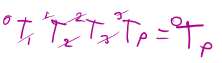

(\begin{array}{cccc} \cos\left(\theta _{1,2}+\theta _{2,3}+\theta _{O,1}\right) & -\sin\left(\theta _{1,2}+\theta _{2,3}+\theta _{O,1}\right) & 0 & x_{O,1}+L_{2}\,\cos\left(\theta _{1,2}+\theta _{O,1}\right)+L_{1}\,\cos\left(\theta _{O,1}\right)+L_{3}\,\cos\left(\theta _{1,2}+\theta _{2,3}+\theta _{O,1}\right)\\ \sin\left(\theta _{1,2}+\theta _{2,3}+\theta _{O,1}\right) & \cos\left(\theta _{1,2}+\theta _{2,3}+\theta _{O,1}\right) & 0 & y_{O,1}+L_{2}\,\sin\left(\theta _{1,2}+\theta _{O,1}\right)+L_{1}\,\sin\left(\theta _{O,1}\right)+L_{3}\,\sin\left(\theta _{1,2}+\theta _{2,3}+\theta _{O,1}\right)\\ 0 & 0 & 1 & 0\\ 0 & 0 & 0 & 1 \end{array}\)

### Modelo cinemático directo de la postura


Se extrae la información relevante, que es la posición del punto P y el ángulo que afecta la orientación de P. Se aprecia que estos valores dependen de la información sacada anteriormente mostrando los efectos que tienen las uniones sobre nuestro punto de interés. Estos valores formaran el vector de pose. En si  proceso permite determinar la posición y orientación del efector final en función de un conjunto determinado de variables conjuntas. 


(\begin{array}{c} x_{O,1}+L_{2}\,\cos\left(\theta _{1,2}+\theta _{O,1}\right)+L_{1}\,\cos\left(\theta _{O,1}\right)+L_{3}\,\cos\left(\theta _{1,2}+\theta _{2,3}+\theta _{O,1}\right)\\ y_{O,1}+L_{2}\,\sin\left(\theta _{1,2}+\theta _{O,1}\right)+L_{1}\,\sin\left(\theta _{O,1}\right)+L_{3}\,\sin\left(\theta _{1,2}+\theta _{2,3}+\theta _{O,1}\right)\\ \theta _{1,2}+\theta _{2,3}+\theta _{O,1} \end{array}\)

### Modelo cinemático inverso de la postura 

La cinemática inversa es el proceso inverso de la cinemática directa.En este método, las variables de articulación se determinan en función de la configuración deseada del efector final. 

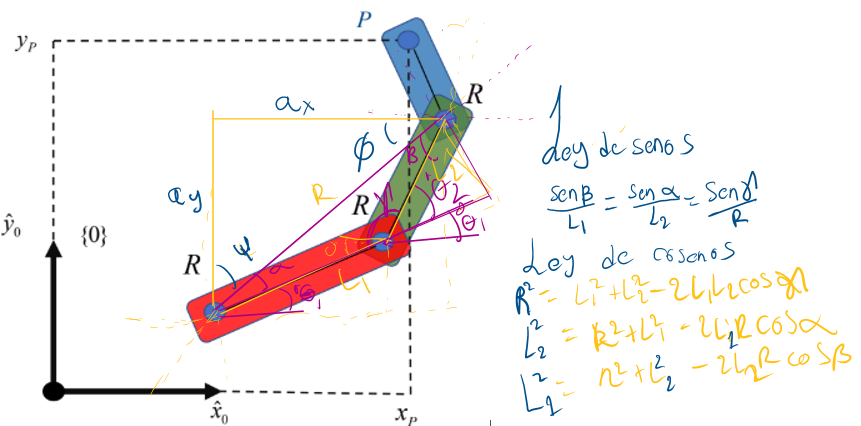

Para calcular el valor de los ángulos se utilizan las leyes de cosenos, de senos y el teorema de Pitágoras. Se comienza con el cálculo de ay y ax, que son la suma de las proyecciones de los triángulos rectángulos que se forman con theta_0_1 y theta_1_2. Usando matlab


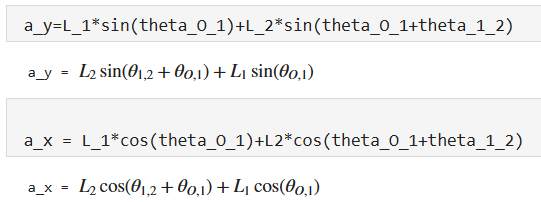

Utilizando el teorema de Pitágoras, es posible determinar la magnitud del vector R, que representa la distancia entre el sistema 1 y el sistema 2 del triángulo formado por las longitudes de los eslabones. Esta se calcula con la siguiente expresión:

$R = \sqrt{a_x^2 + a_y^2}$


De la ley de cosenos podemos deducir el ángulo gamma  

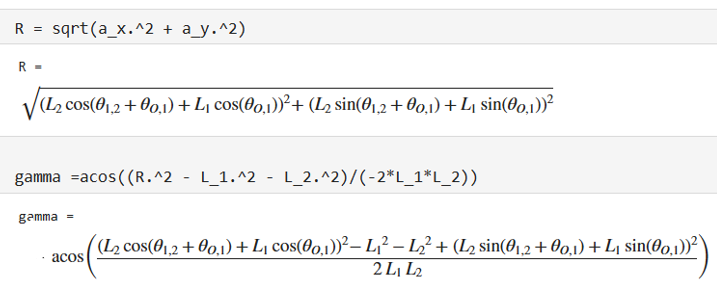

Para sacar el valor de theta_1_2, se puede ver que el valor de gamma está estrechamente relacionado, ya que la suma de los dos ángulos da Pi, en consecuencia:

$\theta_2 = \pi - acos\left(\frac{R^2 - L_1^2 - L_2^2}{2 L_1 L_2}\right)$

Para encontrar la expresión de theta_0_1 se calcula el ángulo alfa y  Psi.

Para alfa se utiliza el triángulo rectángulo formado por el sistema de coordenadas uno y tres que pasa por el sistema dos. Para ello se emplea la definición de coseno.Este concepto se ocupa en triángulo pequeño y luego en el grande.

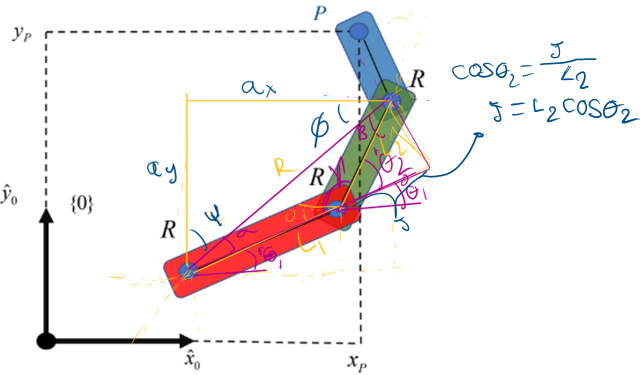

$$
cos(alfa)= 
\frac{
L_{1} + L_{2} \cos\left(\theta_{1,2}\right)
}{
\sqrt{
\left( L_{2} \cos\left(\theta_{1,2} + \theta_{O,1}\right) + L_{1} \cos\left(\theta_{O,1}\right) \right)^2 +
\left( L_{2} \sin\left(\theta_{1,2} + \theta_{O,1}\right) + L_{1} \sin\left(\theta_{O,1}\right) \right)^2
}
}
$$






$$
alafa =
\mathrm{acos}\left(
\frac{
L_{1} + L_{2} \cos\left(\theta_{1,2}\right)
}{
\sqrt{
\left( L_{2} \cos\left(\theta_{1,2} + \theta_{O,1}\right) + L_{1} \cos\left(\theta_{O,1}\right) \right)^2 +
\left( L_{2} \sin\left(\theta_{1,2} + \theta_{O,1}\right) + L_{1} \sin\left(\theta_{O,1}\right) \right)^2
}
}
\right)
$$

Para encontrar el ángulo  ∅, se aplica el mismo procedimiento utilizando el triángulo formado por los vectores a_x y a_y.


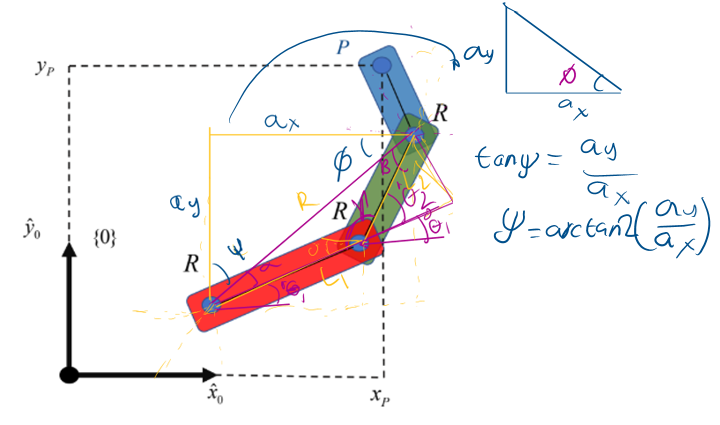

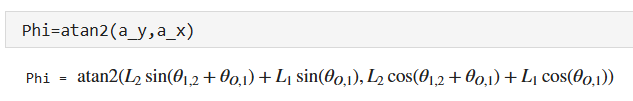

Se utiliza la función atan2, ya que permite obtener soluciones en los cuatro cuadrantes del plano cartesiano. Por ende es útil para garantizar que cualquier posición tenga una solución válida.

Utilizando la imagen como guía , se observa que el ángulo ψ es igual a la suma de los ángulos θ_0_1 y α. Por lo tanto, se tiene la siguiente relación:

$$
\phi = \theta_{0,1} + \alpha
$$

De esta expresión se puede despejar 𝜃_0_1 como:

$$
\theta_{0,1} = \phi- \alpha
$$


Para obtener la expresión de 𝜃_2_3, se sigue un procedimiento similar
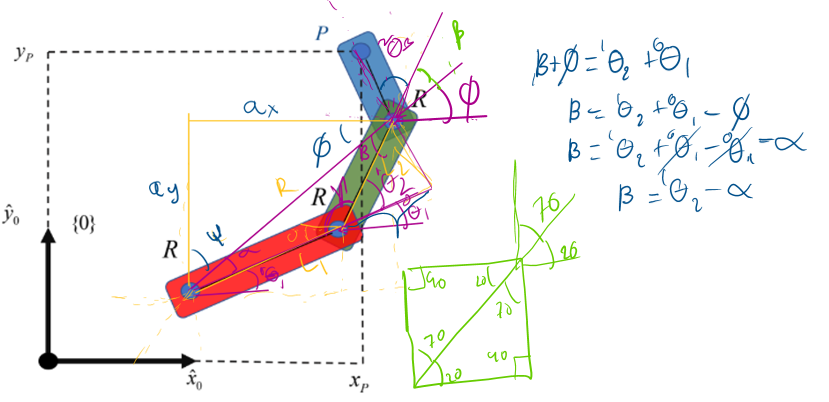
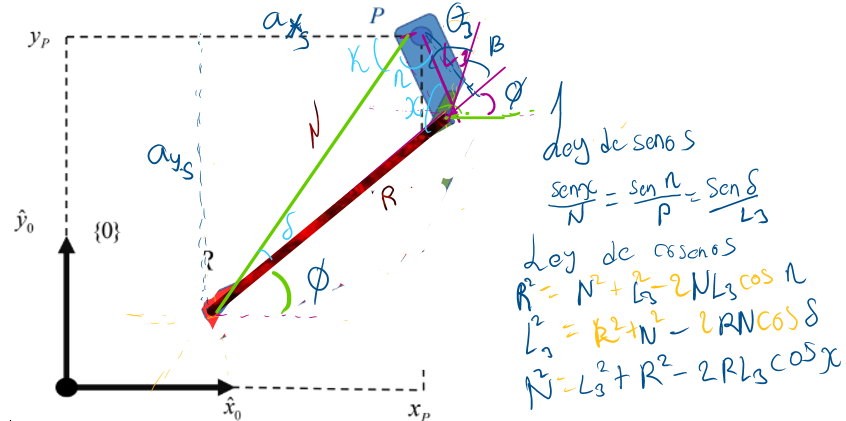

Se utiliza el teorema de Pitágoras para determinar la longitud del segmento 𝑁

$$
N = \sqrt{a_{xs}^2 + a_{ys}^2}
$$

Posteriormente, se despeja el ángulo χ de la ley de los cosenos. Dado que los ángulos χ, β y θ2,3 forman un ángulo π, se tiene la siguiente relación:


$\chi = \arccos\left(\frac{N^2 - L_3^2 - R^2}{-2RL_3}\right)$

$$
\theta_{2,3} = \pi - \chi - \beta
$$
Para determinar el valor del ángulo 𝜅, se emplea la definición de la tangente:

$$
\tan(\kappa) = \frac{a_{ys}}{a_{xs}}
$$

$$
\kappa = \tan^{-1}\left(\frac{a_{ys}}{a_{xs}}\right) = \text{atan2}(a_{ys}, a_{xs})
$$
Finalmente, considerando la relación entre los ángulos, se tiene:

$$
\delta = \kappa - \phi
$$


Con esto se obtiene la definición completa de cada uno de los ángulos que determinan las articulaciones del robot, para llegar a la configuración deseada del punto P dentro del plano de trabajo.

$$
\theta_{2,3} = \pi - \chi - \beta
$$

$$
\theta_{0,1} = \phi- \alpha
$$

$$ \theta_{1,2} = \pi - acos\left(\frac{R^2 - L_1^2 - L_2^2}{2 L_1 L_2}\right)$$

## Modelado cinemático de las velocidades

La cinemática diferencial establece la relación entre los movimientos de las articulaciones y el movimiento resultante del efector final del manipulador. En otras palabras, relaciona los ajustes de posición de las articulaciones (cinemática inversa de velocidades) con los cambios correspondientes en la posición y orientación del efector final (cinemática directa de velocidades). Estas dos perspectivas son fundamentales para múltiples aplicaciones prácticas en robótica. 

 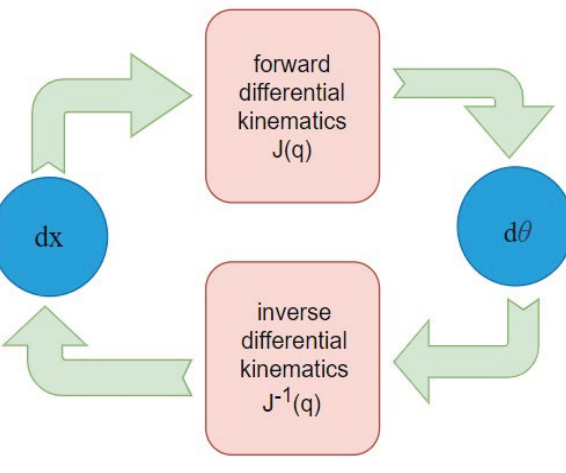 

### Modelo cinemático directo de las velocidades 

En la cinemática directa de las velocidades, las entradas son los movimientos que realizan las articulaciones, mientras que la salida muestra el cambio del vector de pose del efecto final. El jacobiano presente en el modelo representa una matriz de sensibilidad, describiendo cómo los cambios en las velocidades de las articulaciones afectan directamente el movimiento del efector. Este modelo se utiliza comúnmente en el diseño y control de trayectorias [1].

Aplicando la deriva total en el vector de postura, obtenido del modelo cinemático directo de la pose, tenemos lo siguiente expresión:
                                dξ/dt=J⋅q˙
por lo tanto usando matlab:
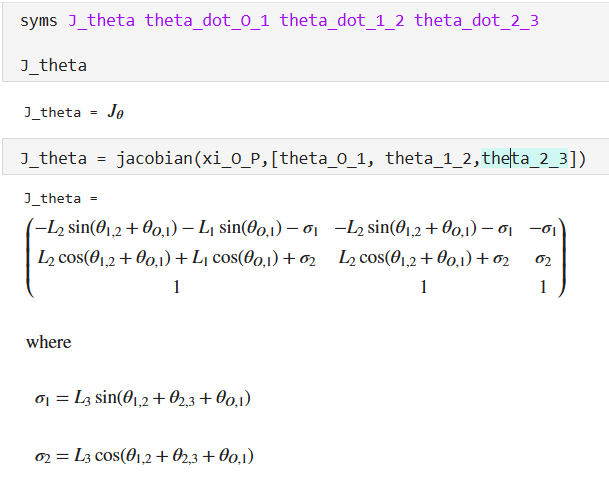

Al aplicar el operador de derivada total sobre el vector de postura, se rompen las relaciones anteriores geométricas y se establecen nuevas relaciones de tipo diferencial. Con la aplicación de la regla de la cadena se obtiene la matriz jacobina multiplicada por el vector de velocidades articulares.

(\begin{array}{ccc} -L_{2}\,\sin\left(\theta _{1,2}+\theta _{O,1}\right)-L_{1}\,\sin\left(\theta _{O,1}\right)-L_{3}\,\sin\left(\theta _{1,2}+\theta _{2,3}+\theta _{O,1}\right) & -L_{2}\,\sin\left(\theta _{1,2}+\theta _{O,1}\right)-L_{3}\,\sin\left(\theta _{1,2}+\theta _{2,3}+\theta _{O,1}\right) & -L_{3}\,\sin\left(\theta _{1,2}+\theta _{2,3}+\theta _{O,1}\right)\\ L_{2}\,\cos\left(\theta _{1,2}+\theta _{O,1}\right)+L_{1}\,\cos\left(\theta _{O,1}\right)+L_{3}\,\cos\left(\theta _{1,2}+\theta _{2,3}+\theta _{O,1}\right) & L_{2}\,\cos\left(\theta _{1,2}+\theta _{O,1}\right)+L_{3}\,\cos\left(\theta _{1,2}+\theta _{2,3}+\theta _{O,1}\right) & L_{3}\,\cos\left(\theta _{1,2}+\theta _{2,3}+\theta _{O,1}\right)\\ 1 & 1 & 1 \end{array})

(\begin{array}{c} \dot{\theta }_{O,1}\\ \dot{\theta }_{1,2}\\ \dot{\theta }_{2,3} \end{array})

$$
 \dot{\mathbf{x}} = J(\boldsymbol{\theta})\dot{\boldsymbol{\theta}} 
$$

Donde:

•	θ˙ es el vector de velocidades articulares.

•	x˙ es el vector de velocidad lineal y angular de la pose.

•	J−1(θ) es la inversa del Jacobiano.

Lo que representa físicamente el jacobiano es la velocidad lineal que se presenta por el movimiento de cada articulación, de tal manera que:

•	La primera columna contiene la velocidad lineal provocada por la articulación theta_o_1.

•	La segunda columna contine la velocidad lineal provocada por theta_1_2.

•	La tercera columna engloba a las velocidades lineales provocadas por theta_2_3. 

Por otro lado, las filas del jacobiano se refieren a las componentes de esas velocidades. La primera fila representa a las componentes en x. La segunda, a las componentes en y. Y por último la tercera nos indica que el giro es sobre el eje Z.


### Modelo cinemático inverso de las velocidades

La cinemática inversa de las velocidades toma como entrada los cambios en la posición y orientación del efecto final, y proporciona como salida el movimiento necesario de las articulaciones para llegara dicha postura. Este tipo de cinemática se utiliza para obtener el control preciso de las articulaciones para lograr un control preciso del manipulador.

Para obtener las velocidades articulares, se despeja el vector θ˙de la expresión de la cinemática directa de velocidades. Multiplicamos por ambos lados de la igualdad la inversa del jacobiano lo cual permite aislar las velocidades articulares:

$$
\dot{\boldsymbol{\theta}} = J^{-1}(\boldsymbol{\theta}) \cdot \dot{\mathbf{x}}
$$

Donde:

•	θ˙ es el vector de velocidades articulares.

•	x˙ es el vector de velocidad lineal y angular de la pose.

•	J−1(θ) es la inversa del Jacobiano.

Normalmente, cuando el Jacobiano no es una matriz cuadrada, es decir, cuando el número de grados de libertad del robot no coincide con la dimensión del espacio de tareas, se recurre al uso de la seudo-inversa para resolver la cinemática inversa de las velocidades. Sin embargo, en este caso particular, dado que el Jacobiano es una matriz cuadrada (3×3), basta con calcular su inversa directamente para obtener una solución exacta, siempre que no esté en una configuración singular. Entendiendo que la configuración singular se refiere a posiciones robóticas específicas en las que el efector final experimenta una reducción en sus grados de libertad.
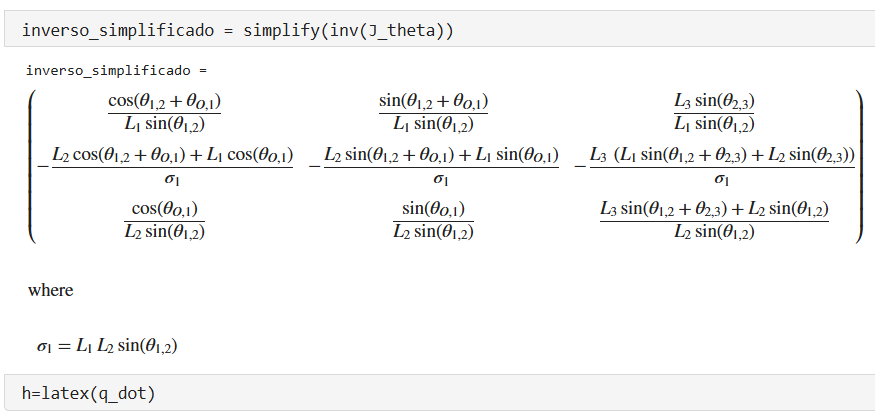

(\begin{array}{ccc} \frac{\cos\left(\theta _{1,2}+\theta _{O,1}\right)}{L_{1}\,\sin\left(\theta _{1,2}\right)} & \frac{\sin\left(\theta _{1,2}+\theta _{O,1}\right)}{L_{1}\,\sin\left(\theta _{1,2}\right)} & \frac{L_{3}\,\sin\left(\theta _{2,3}\right)}{L_{1}\,\sin\left(\theta _{1,2}\right)}\\ -\frac{L_{2}\,\cos\left(\theta _{1,2}+\theta _{O,1}\right)+L_{1}\,\cos\left(\theta _{O,1}\right)}{L_{1}\,L_{2}\,\sin\left(\theta _{1,2}\right)} & -\frac{L_{2}\,\sin\left(\theta _{1,2}+\theta _{O,1}\right)+L_{1}\,\sin\left(\theta _{O,1}\right)}{L_{1}\,L_{2}\,\sin\left(\theta _{1,2}\right)} & -\frac{L_{3}\,\left(L_{1}\,\sin\left(\theta _{1,2}+\theta _{2,3}\right)+L_{2}\,\sin\left(\theta _{2,3}\right)\right)}{L_{1}\,L_{2}\,\sin\left(\theta _{1,2}\right)}\\ \frac{\cos\left(\theta _{O,1}\right)}{L_{2}\,\sin\left(\theta _{1,2}\right)} & \frac{\sin\left(\theta _{O,1}\right)}{L_{2}\,\sin\left(\theta _{1,2}\right)} & \frac{L_{3}\,\sin\left(\theta _{1,2}+\theta _{2,3}\right)+L_{2}\,\sin\left(\theta _{1,2}\right)}{L_{2}\,\sin\left(\theta _{1,2}\right)} \end{array})

### Rango de movimiento 
Otro aspecto importante para considerar es el determinante del Jacobiano, ya que proporciona información sobre el espacio de trabajo del robot SCARA. El valor del determinante indica la capacidad de movimiento del efector final: cuando su valor se aproxima a cero, el manipulador pierde grados de libertad y no puede moverse libremente en ciertas direcciones.

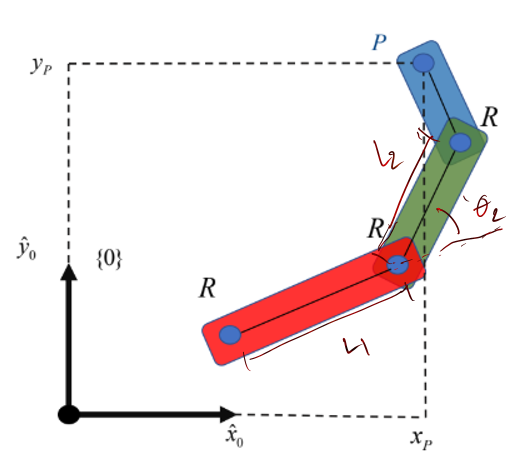

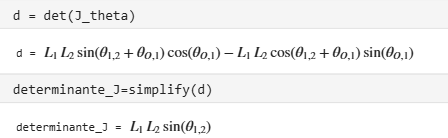


Para analizar este comportamiento, se estudian las variables que afectan directamente el determinante del Jacobiano. Para realizar la gráfica se fijan las longitudes de los eslabones y se varía el ángulo del que depende el determinante, con el fin de observar cómo afecta a la capacidad de movimiento. Por lo cual se ocupa el siguiente código.

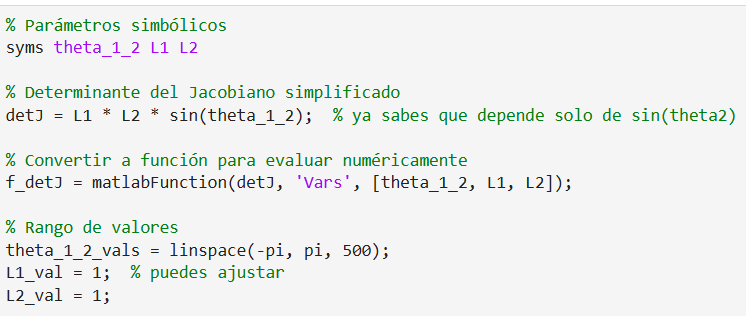
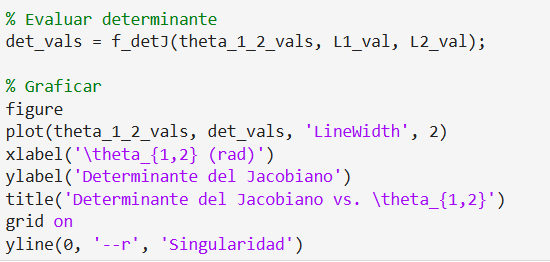
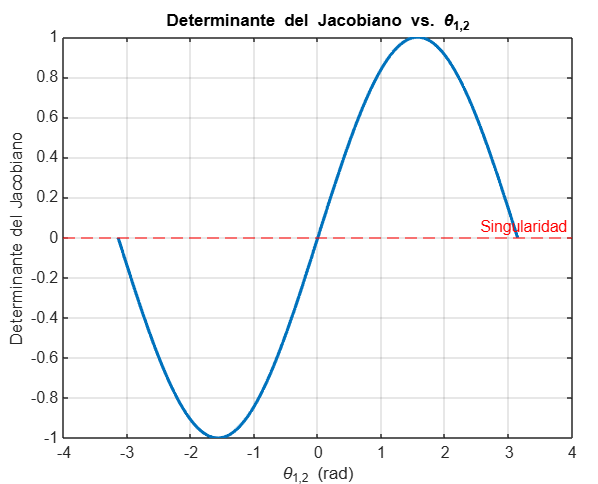

Se observa que cuando el valor del ángulo θ₁₂ es cero, el determinante también es igual a cero. A medida que el ángulo aumenta a π/2 (1.5708 rad), el determinante alcanza un valor máximo. El valor del determinante está influenciado por la longitud de los eslabones: mientras mayores sean estas longitudes, mayor será el rango de movimiento posible del sistema. En el caso analizado, se asumieron longitudes unitarias para simplificar el modelo.


## Modelado cinemático de las aceleraciones

Para obtener el modelo cinemático de las aceleraciones, se parte del modelo previamente desarrollado para las velocidades y se aplica la derivada total. Permitiendo relacionar las aceleraciones del efector final con las aceleraciones articulares.

### Modelado cinemático drecto de las aceleraciones 
Partiendo del modelo cinemático directo de velocidades:

$$
 \dot{\mathbf{x}} = J(\boldsymbol{\theta})\dot{\boldsymbol{\theta}} 
$$

se aplica el operador de derivada total, teniendo en cuenta la derivada de un producto. Como resultado, la expresión para la aceleración del efector final queda de la siguiente forma:

$$
^{0}\ddot{\xi}_P = \frac{d}{dt} \, ^{0}\dot{\xi}_P = 
\frac{\partial \, ^{0}\dot{\xi}_P}{\partial \, ^{0}\theta_1} \, ^{0}\dot{\theta}_1 + 
\frac{\partial \, ^{0}\dot{\xi}_P}{\partial \, ^{0}\dot{\theta}_1} \, ^{0}\ddot{\theta}_1
$$

$$
\ddot{\mathbf{x}} = \dot{J}(\boldsymbol{\theta}) \cdot \dot{\boldsymbol{\theta}} + J(\boldsymbol{\theta}) \cdot \ddot{\boldsymbol{\theta}}
$$

Para obtener el modelo cinemático directo de las aceleraciones, comenzamos derivando el Jacobiano. Aplicando la regla de la cadena, considerando que cada elemento del Jacobiano depende de los ángulos que tomen las articulaciones, que dependen de la posición que se requiera.

$$
\dot{J}(\boldsymbol{\theta}) = \frac{d}{dt}J(\boldsymbol{\theta}(t)) = \sum_{i=1}^{n} \frac{\partial J}{\partial \theta_i} \cdot \dot{\theta}_i
$$

La siguiente expresión, implementada en MATLAB, corresponde a la derivada del Jacobiano. En este caso, la variable p representa la matriz Jacobiana, mientras que a_normal corresponde a su derivada. Esta derivación incluye el efecto de cada velocidad articular sobre los términos de la matriz Jacobiana.

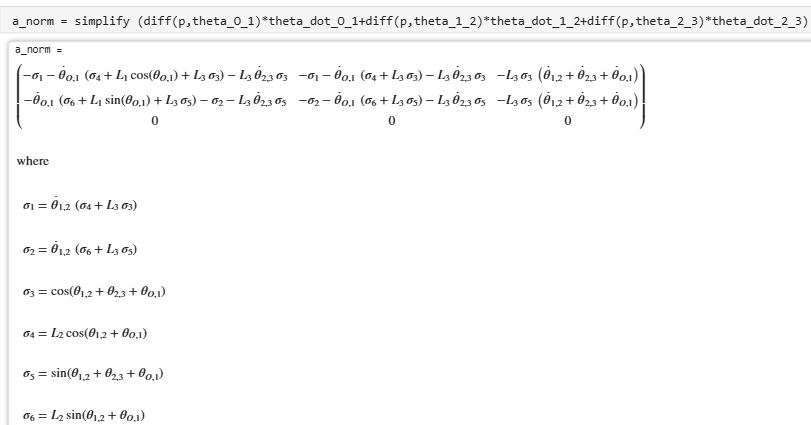

Una vez obtenida la derivada del Jacobiano, se procede a derivar también el vector de velocidades articulares para completar el modelo cinemático de las aceleraciones. 

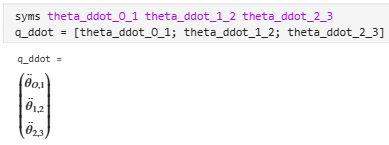

De este modo, se construye la expresión total de la aceleración del efector final.


$$
\ddot{\mathbf{x}} = \dot{J}(\boldsymbol{\theta}) \cdot \dot{\boldsymbol{\theta}} + J(\boldsymbol{\theta}) \cdot \ddot{\boldsymbol{\theta}}
$$

Donde:

#### $ \dot{J}(\boldsymbol{\theta}) $ es igual a:

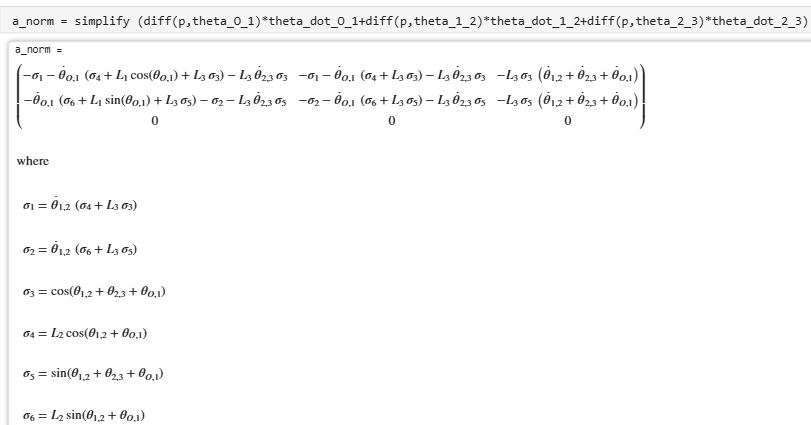


#### $ \dot{\boldsymbol{\theta}} $ es igual a:


\begin{pmatrix}
\dot{\theta}_{O,1} \\
\dot{\theta}_{1,2} \\
\dot{\theta}_{2,3}
\end{pmatrix}

#### $ J(\boldsymbol{\theta}) $ es igual a:

\
\begin{pmatrix}
 -L_2 \sin(\theta_{1,2} + \theta_{O,1}) - L_1 \sin(\theta_{O,1}) - L_3 \sin(\theta_{1,2} + \theta_{2,3} + \theta_{O,1}) & -L_2 \sin(\theta_{1,2} + \theta_{O,1}) - L_3 \sin(\theta_{1,2} + \theta_{2,3} + \theta_{O,1}) & -L_3 \sin(\theta_{1,2} + \theta_{2,3} + \theta_{O,1}) \\
 L_2 \cos(\theta_{1,2} + \theta_{O,1}) + L_1 \cos(\theta_{O,1}) + L_3 \cos(\theta_{1,2} + \theta_{2,3} + \theta_{O,1}) & L_2 \cos(\theta_{1,2} + \theta_{O,1}) + L_3 \cos(\theta_{1,2} + \theta_{2,3} + \theta_{O,1}) & L_3 \cos(\theta_{1,2} + \theta_{2,3} + \theta_{O,1}) \\
 1 & 1 & 1
\end{pmatrix}

#### $ \ddot{\boldsymbol{\theta}} $ es igual a:

\begin{pmatrix}
\ddot{\theta}_{O,1} \\
\ddot{\theta}_{1,2} \\
\ddot{\theta}_{2,3}
\end{pmatrix}


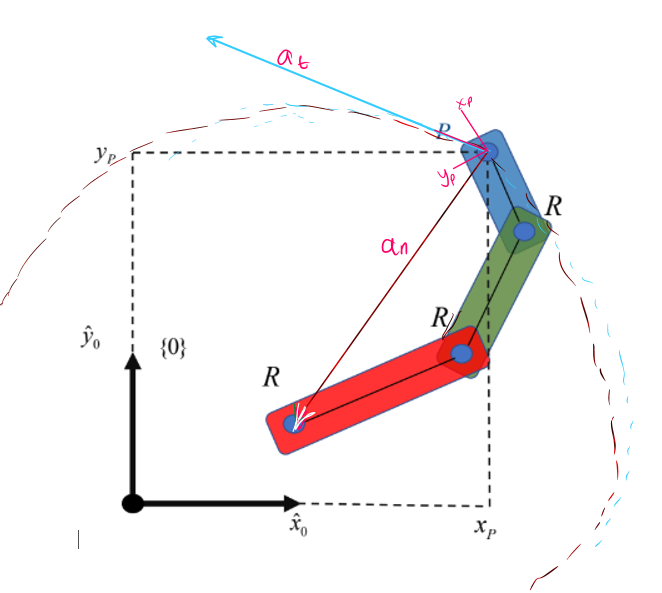

En el modelo cinemático de las aceleraciones, la expresión resultante puede descomponerse en dos componentes principales: la aceleración normal y la aceleración tangencial del punto P, ambas generadas por las articulaciones del robot.

La primera parte de la sumatoria representa la aceleración normal del punto P, asociada a cada articulación:

•	La primera columna contiene la aceleración normal provocada por la articulación theta_o_1.

•	La segunda columna contine la aceleración normal provocada por theta_1_2.

•	La tercera columna engloba a las aceleración normal provocadas por theta_2_3. 

La segunda parte de la sumatoria representa la aceleración tangencial del punto P, producida por las aceleraciones angulares de las articulaciones:

•	La primera columna contiene la aceleración tangencial provocada por la articulación theta_o_1.

•	La segunda columna contine la aceleración tangencial provocada por theta_1_2.

•	La tercera columna engloba a la aceleración tangencial provocada por theta_2_3. 



### Modelado cinemático inverso de las aceleraciones 

Partiendo del modelo cinemático inverso de velocidades:

$$
\dot{\boldsymbol{\theta}} = J^{-1}(\boldsymbol{\theta}) \cdot \dot{\mathbf{x}}
$$

se aplica el operador de derivada total, teniendo en cuenta la derivada de un producto. Como resultado, la expresión para la aceleración  de las articulaciones queda de la siguiente forma:

$$
\ddot{\boldsymbol{\theta}} = \dot{J^{-1}}(\boldsymbol{\theta}) \cdot \dot{\mathbf{x}} + J^{-1}(\boldsymbol{\theta}) \cdot \ddot{\mathbf{x}}
$$

$$
\[
\ddot{\mathbf{q}} = \mathbf{J}(\mathbf{q})^{+} \, {}^0\ddot{\boldsymbol{\xi}}_P + \dot{\mathbf{J}}(\mathbf{q})^{+} \, {}^0\dot{\boldsymbol{\xi}}_P
\]
$$
Donde:
#### $ \dot{J^{-1}}(\boldsymbol{\theta})  $ es igual a:

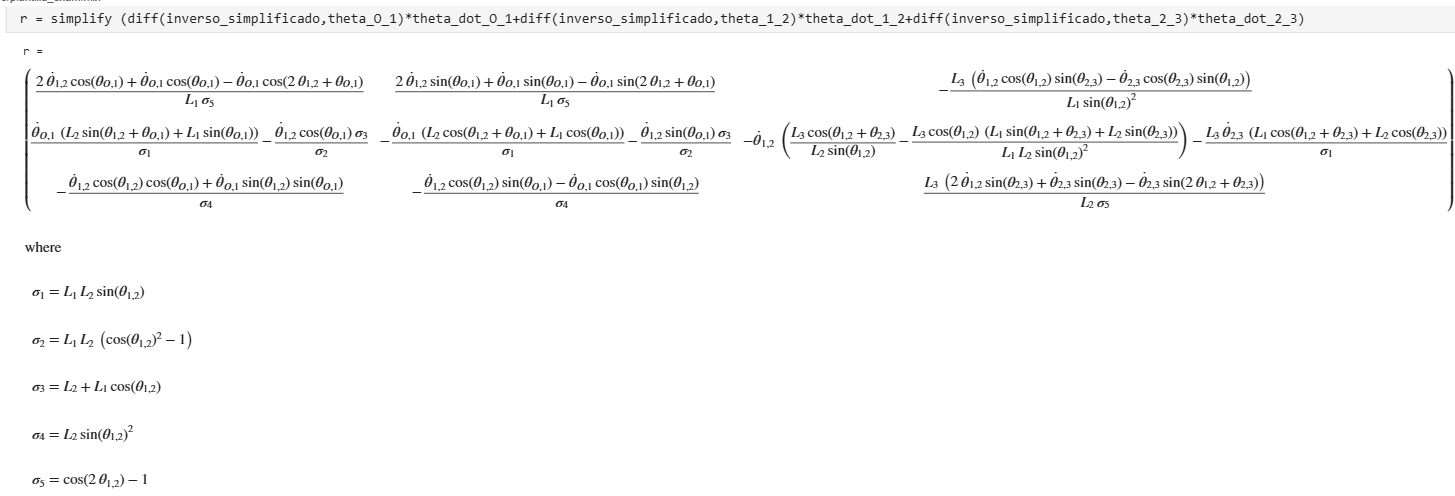

#### $ \dot{\mathbf{x}} _P $ es igual a:

\begin{pmatrix}
{}^0\dot{x}_P \\
{}^0\dot{y}_P \\
{}^0\dot{\theta}_P
\end{pmatrix}


#### $ J^{-1}(\boldsymbol{\theta}) $ es igual a:

(\begin{array}{ccc} \frac{\cos\left(\theta _{1,2}+\theta _{O,1}\right)}{L_{1}\,\sin\left(\theta _{1,2}\right)} & \frac{\sin\left(\theta _{1,2}+\theta _{O,1}\right)}{L_{1}\,\sin\left(\theta _{1,2}\right)} & \frac{L_{3}\,\sin\left(\theta _{2,3}\right)}{L_{1}\,\sin\left(\theta _{1,2}\right)}\\ -\frac{L_{2}\,\cos\left(\theta _{1,2}+\theta _{O,1}\right)+L_{1}\,\cos\left(\theta _{O,1}\right)}{L_{1}\,L_{2}\,\sin\left(\theta _{1,2}\right)} & -\frac{L_{2}\,\sin\left(\theta _{1,2}+\theta _{O,1}\right)+L_{1}\,\sin\left(\theta _{O,1}\right)}{L_{1}\,L_{2}\,\sin\left(\theta _{1,2}\right)} & -\frac{L_{3}\,\left(L_{1}\,\sin\left(\theta _{1,2}+\theta _{2,3}\right)+L_{2}\,\sin\left(\theta _{2,3}\right)\right)}{L_{1}\,L_{2}\,\sin\left(\theta _{1,2}\right)}\\ \frac{\cos\left(\theta _{O,1}\right)}{L_{2}\,\sin\left(\theta _{1,2}\right)} & \frac{\sin\left(\theta _{O,1}\right)}{L_{2}\,\sin\left(\theta _{1,2}\right)} & \frac{L_{3}\,\sin\left(\theta _{1,2}+\theta _{2,3}\right)+L_{2}\,\sin\left(\theta _{1,2}\right)}{L_{2}\,\sin\left(\theta _{1,2}\right)} \end{array})

#### $ \ddot{\mathbf{x}} $ es igual a:

\begin{pmatrix}
{}^0\ddot{x}_P \\
{}^0\ddot{y}_P \\
{}^0\ddot{\theta}_P
\end{pmatrix}




## Modelo dinámico

### Modelo dinámico directo 

Para desarrollar este apartado del modelo dinámico, se utiliza el método de Euler-Lagrange, el cual parte del principio de conservación de la energía total del sistema. Esta energía total se expresa como la suma de la energía cinética y la energía potencial. Durante el movimiento del manipulador, estas dos formas de energía se transforman entre sí, pero su suma permanece constante. Es decir, cuando la energía potencial aumenta, la energía cinética disminuye en la misma proporción, y viceversa.


Primero calculamos la energía cinética del sistema que esta conformado por:

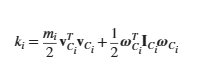

Para calcular el primer sumando de la energía cinética, correspondiente a la velocidad lineal de los centros de masa de cada eslabón, existen dos opciones validas. El primero consiste en realizar una propagación de velocidades a partir del eslabón base hasta cada eslabón sucesivo. El segundo método consiste en calcular la posición del centro de gravedad de cada eslabón con respecto al sistema inercial de coordenadas y luego derivar esa posición para obtener la velocidad lineal.



#### Por propagación de velocidades
Haciendo el primer punto por propagación de velocidades, ocupamos las siguientes fórmulas:

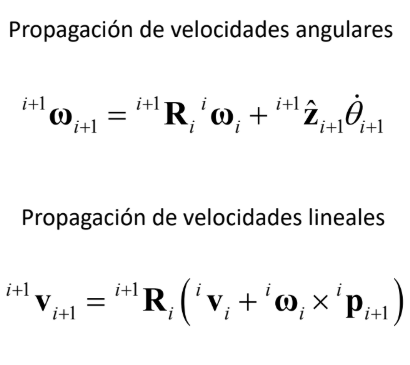 

Se sacan la matriz de orientación de cada uno de los sistemas colocados en las juntas y se transpone. Estos datos se obtienen de la matriz de trasformaciones de cada junta con respecto al punto inmediato anterior (T_O_1, T_1_2, T_2_3).

Para R_O_1

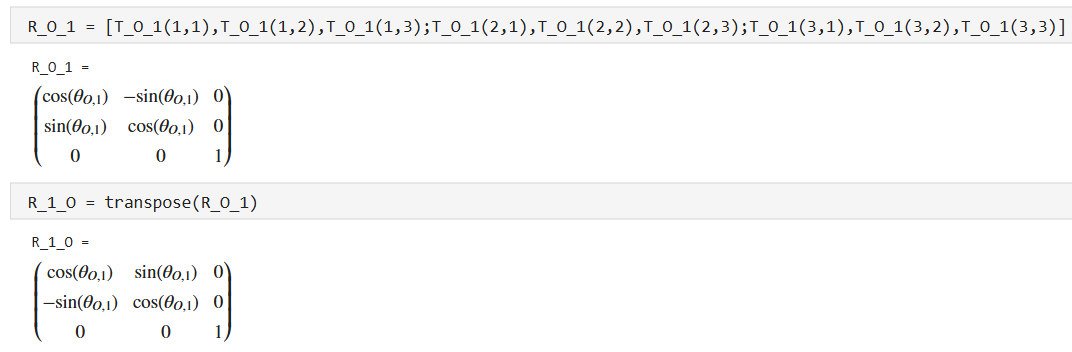

Para R_1_2

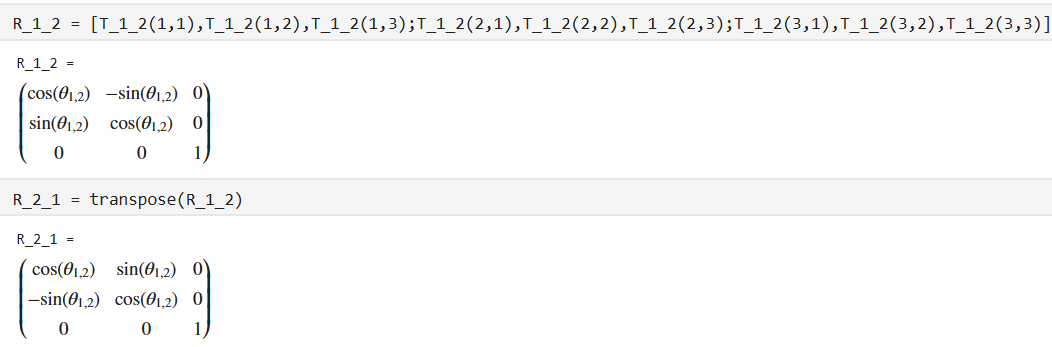

Para R_2_3

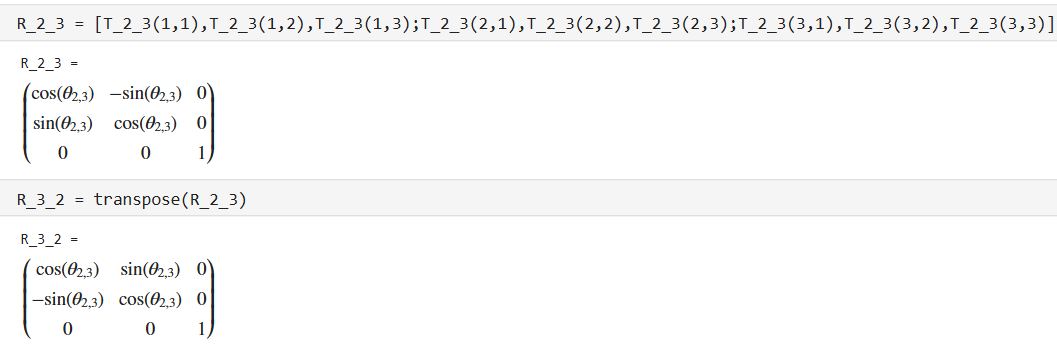

Para obtener las velocidades lineales de los centros de masa, es necesario calcular previamente las velocidades angulares de cada eslabón. Esto se realiza definiendo un vector unitario que indica la dirección del eje de rotación; en este caso, el giro se realiza en torno al eje Z, por lo que se tiene:

$$
\mathbf{n}_{1,1} = \mathbf{n}_{2,2} = \mathbf{n}_{3,3} =
\begin{bmatrix}
0 \\
0 \\
1
\end{bmatrix}
$$

Se utiliza la transpuesta de la matriz de orientación que anteriormente se calculó, la derivada angular correspondiente a cada eslabón y la velocidad angular anterior.

Para omega_1_1

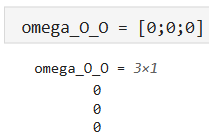
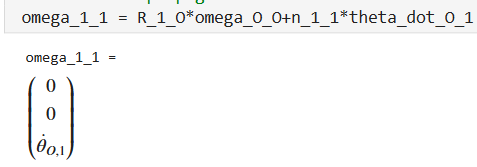

Para omega_2_2

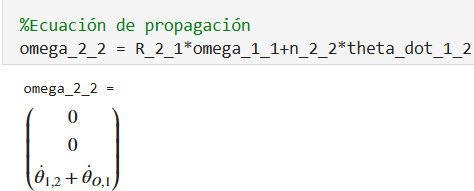

Para omega_3_3

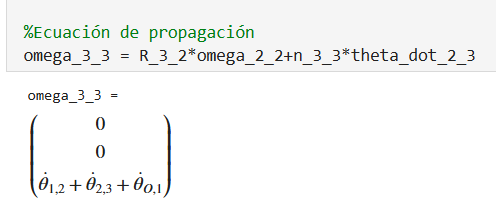

Para la primera parte, la velocidad lineal del sistema uno utilizando la formula está dada por:

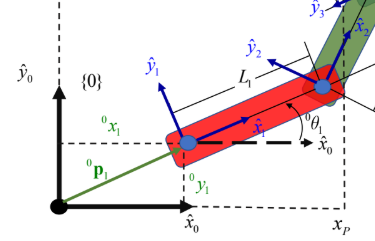 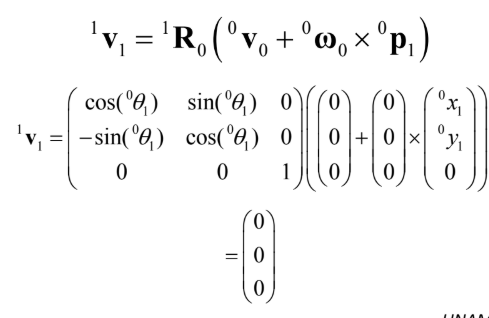

Para el sistema 2 se tiene

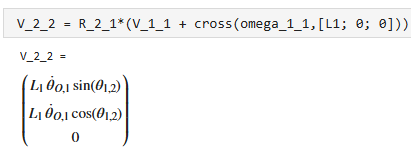

Para el sistema 3 se tiene 

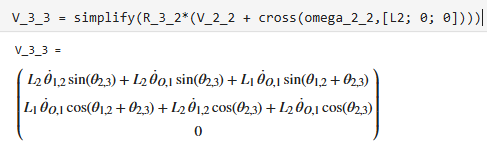

Para calcular la propagación de velocidades hacia los centros de masa, se utiliza la misma formulación aplicada en la propagación entre juntas, con la consideración adicional de que las velocidades angulares en el centro de masa de cada eslabón son iguales a las de su sistema de coordenadas asociado a la junta correspondiente.

Para el centro de masa del primer eslabón.

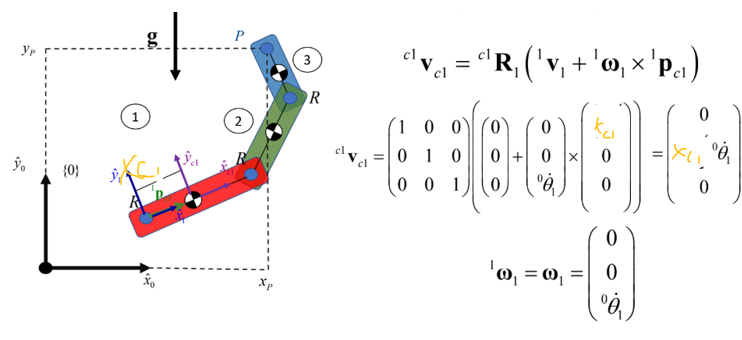 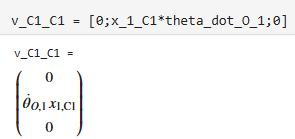

Para el centro de masa del segundo eslabón.

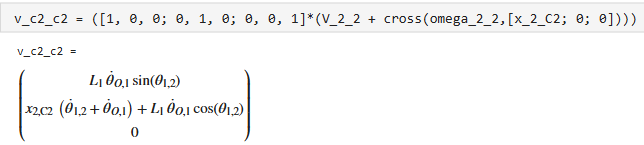

Para el centro de masa del tercer eslabón.

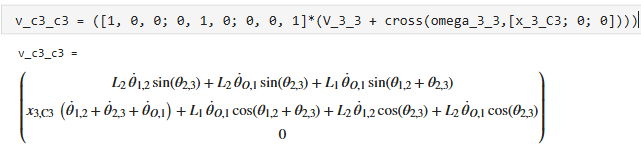

Para estas velocidades, la matriz de orientación es la matriz identidad debido a que el sistema de la junta no cambia con respecto al del centro de masa.


#### Por la derivada de la posición
Para hacerlo con el cálculo de la posición del centro de gravedad sacamos primero las trasformadas de cada punto de interés, suponiendo que el centro de masa se encuentra justo en el centro del eslabón.

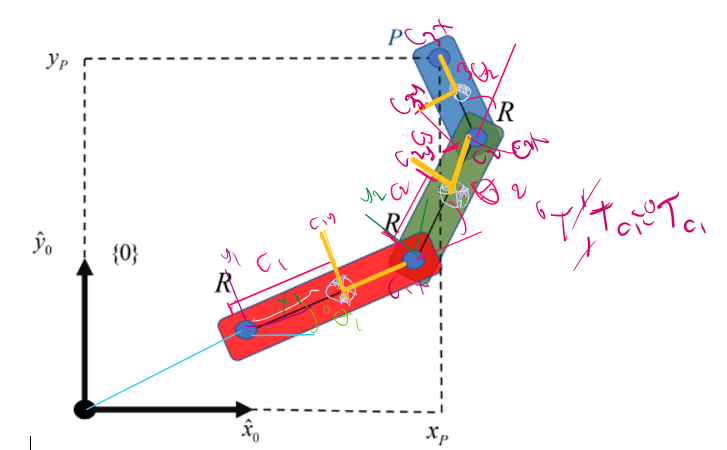

Para hacerlo con el cálculo de la posición del centro de gravedad, se obtiene primero las trasformadas de cada punto de interés, suponiendo que el centro de masa de cada eslabón se encuentra justo en su punto medio. Se considera que el sistema de referencia asociado al centro de gravedad está orientado de manera idéntica al sistema de coordenadas del eslabón correspondiente.

La transformada de C1

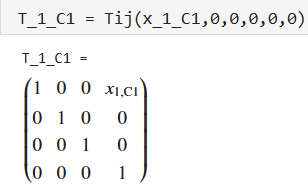

La transformada de C2

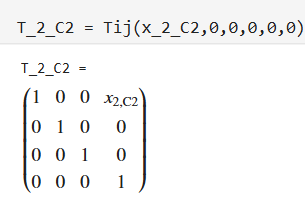

La transformada de C3

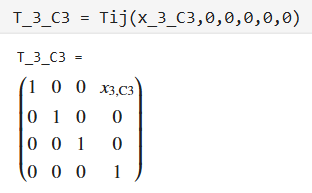

Para obtener las trasformadas desde el origen, multiplicamos la trasformadas de las juntas, que ya se obtuvieron anteriormente, por estas nuevas. 

Para T_0_C1

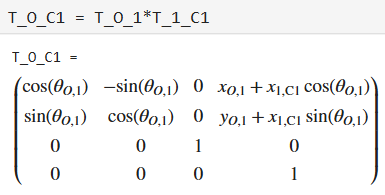

Para T_0_C2

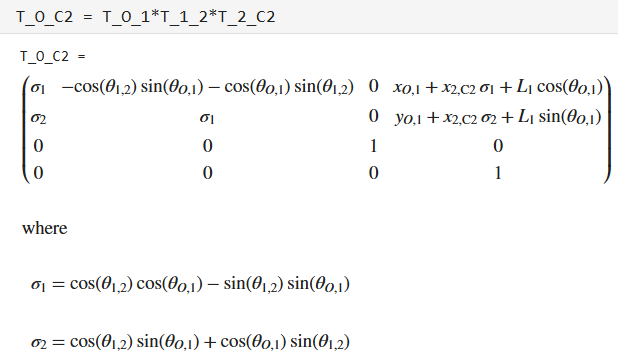

Para T_0_C3

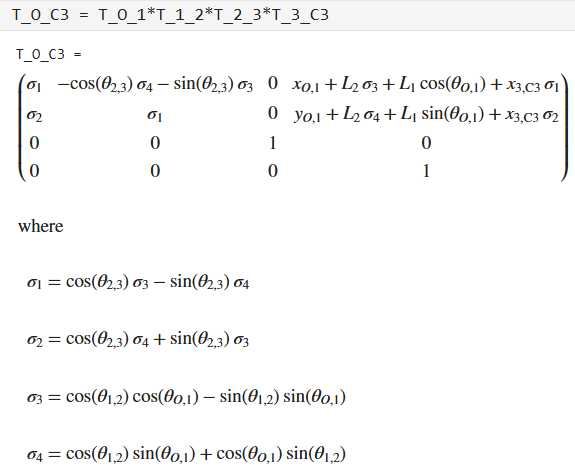

Se sacan los datos de la posición de cada trasformación.

Para P_O_C1

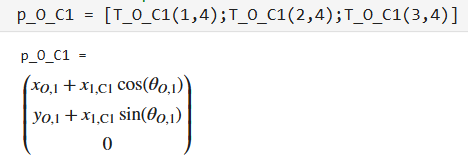

Para P_O_C2

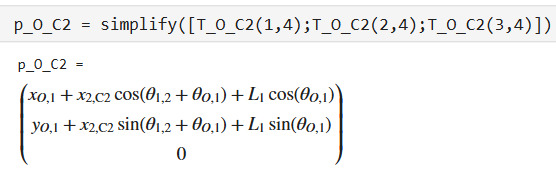

Para P_O_C3

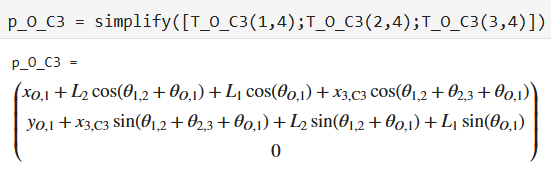

Para sacar las velocidades sacamos la derivada de cada uno de los vectores de posición.

Para V_O_C1

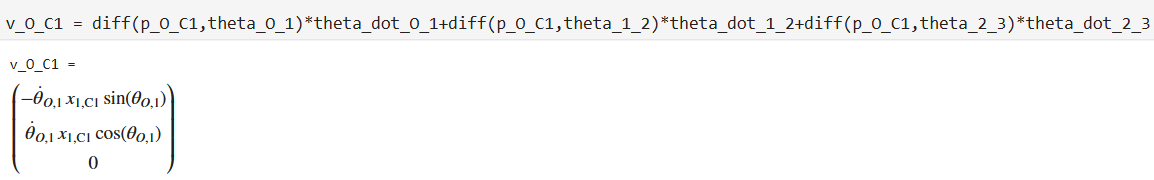

Para V_O_C2

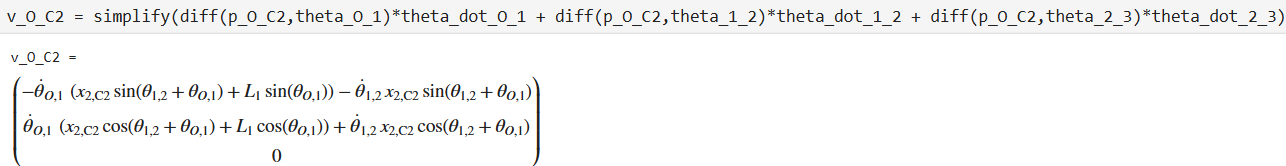

Para V_O_C3

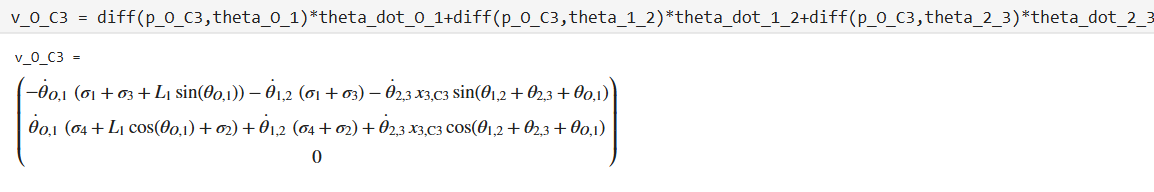

Y así obtenemos las velocidades para el primer sumando de la energía cinética.

#### Seguendo sumando

Prosiguiendo con el segundo sumando de la energía cinética, se definen las matrices de inercia de cada eslabón respecto a su centro de masa. Debido a que los eslabones son rígidos y simétricos respecto al plano de movimiento, las matrices de inercia, solo presentan valores en su diagonal principal.

Para el eslabón uno I_C1

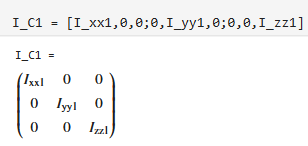

Para el eslabón uno I_C2

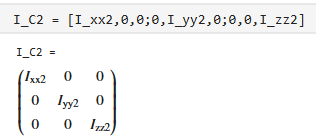

Para el eslabón uno I_C3

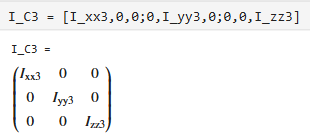

#### Energía cinética 

Con estos datos tendríamos lo necesario para calcular la energía cinética del sistema de dos maneras distintas. Una usando propagación de velocidades y la otra la derivada de la posición del centro de masa. Nótese que la segunda opción fue mucho más rápida.

##### Energía cinética con propagación de velocidades 
Para la energía cinética del eslabón 1.

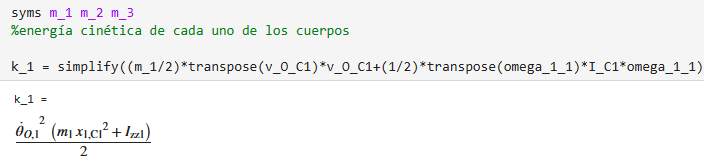

Para la energía cinética del eslabón 2.

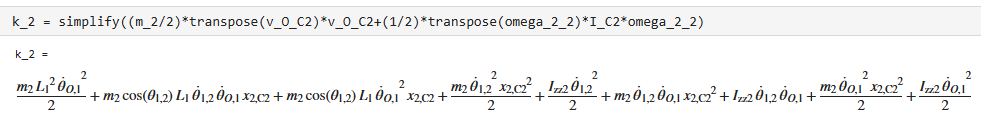

Para la energía cinética del eslabón 3.

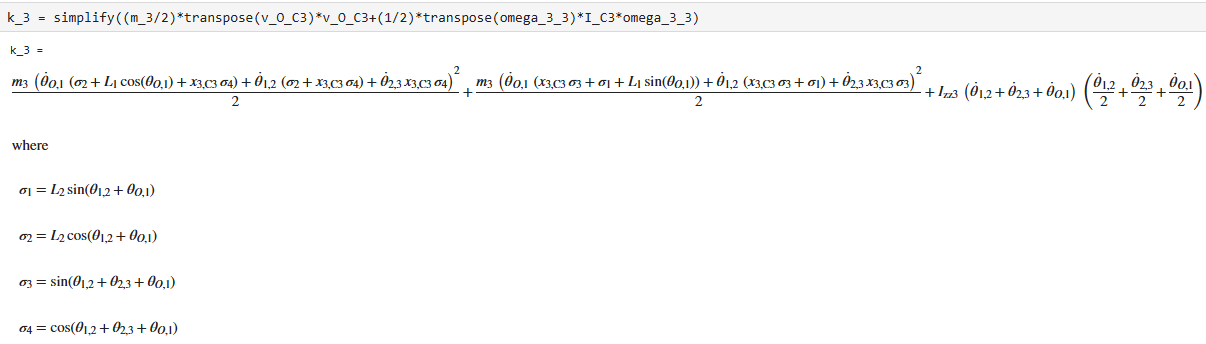

##### Energía cinética con derivada de la posición 

Para la energía cinética del eslabón 1. 

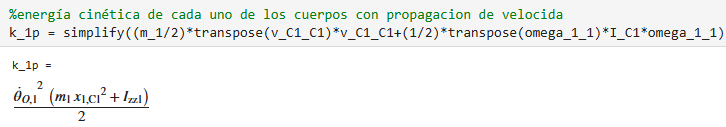

Para la energía cinética del eslabón 2.

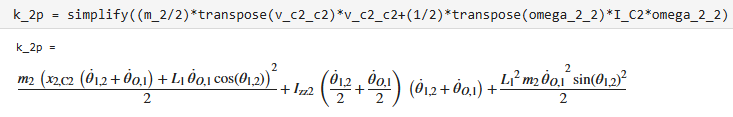

Para la energía cinética del eslabón 3.

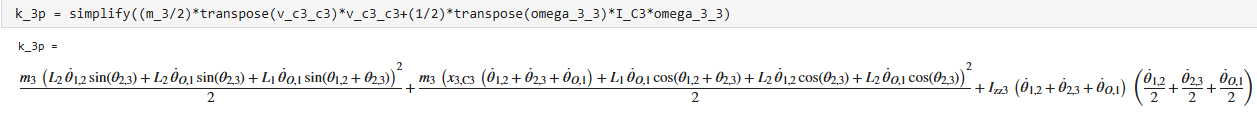



In [ ]:
 ### Modelo dinámico inverso

## Referencias 

[1]	G. B. Muniyandi, “Citation: Muniyandi GB (2024) In-Depth Analysis of Kinematic, Dynamic, and Control Aspects of a 4-Axis SCARA Robot Manipulator,” Int J Robot Eng, vol. 7, p. 37, 2024, doi: 10.35840/2631-5106/4137.

[2]	C. Feng, G. Gao, and Y. Cao, “Kinematic modeling and verification for a SCARA robot,” 2016.

[3]	B. Fernini, “Dynamic Behavior of a SCARA Robot by using N-E Method for a Straight Line and Simulation of Motion by using Solidworks and Verification by Matlab/Simulink,” International Journal of Robotics and Automation (IJRA), vol. 3, no. 4, pp. 221–233, 2014.
